# ***AMAZON BOOK REVIEW USING LSTM***






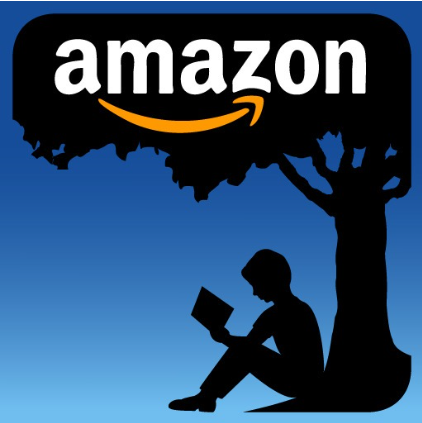

In [ ]:
# importing all the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
import random
random.seed(0)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [ ]:
#reading the dataset
import pandas as pd
import numpy as np
import io
data = pd.read_csv(io.BytesIO(uploaded['preprocessed_data.csv']))
print(data)

     Unnamed: 0  rating                                         reviewText  \
0             0       5  This book was the very first bookmobile book I...   
1             1       1  When I read the description for this book, I c...   
2             2       5  I just had to edit this review. This book is a...   
3             3       5  I don't normally buy 'mystery' novels because ...   
4             4       5  This isn't the kind of book I normally read, a...   
..          ...     ...                                                ...   
196         196       2  A FINE SPECIMEN by Lisa Marie Rice.STORY BRIEF...   
197         197       5  This book like all of Nalini Singh 's was fant...   
198         198       4  An intriguing start to another wonderful serie...   
199         199       1  Book size: novella, max location 2089.The main...   
200         200       2  Absolutely one of the worst mysteries I've rea...   

                                               summary  
0     

In [ ]:
data.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [ ]:
data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
data.tail()

,Unnamed: 0,rating,reviewText,summary
196,196,2,A FINE SPECIMEN by Lisa Marie Rice.STORY BRIEF...,It felt thrown together. I didn't enjoy it. ...
197,197,5,This book like all of Nalini Singh 's was fant...,Angels' pawn
198,198,4,An intriguing start to another wonderful serie...,This Quickie was incredible!
199,199,1,"Book size: novella, max location 2089.The main...",couldn't see what the others saw
200,200,2,Absolutely one of the worst mysteries I've rea...,"Mediocre mystery, vanilla writing."


In [ ]:
data.rating.value_counts()

5    58
4    43
3    35
1    33
2    32
Name: rating, dtype: int64

In [ ]:
# we dont need id and summary so we will drop those columns
data=data.drop(columns=['summary','Unnamed: 0'])

In [ ]:
# final look at the data
data

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."
...,...,...
196,2,A FINE SPECIMEN by Lisa Marie Rice.STORY BRIEF...
197,5,This book like all of Nalini Singh 's was fant...
198,4,An intriguing start to another wonderful serie...
199,1,"Book size: novella, max location 2089.The main..."


In [ ]:
### Since rating has the value range from 1-5 we need to convert it so that we can simply the emotion analaysis.
### We will consider 1,2,3 rating as 0(negative) and 4,5 as 1(postive)
# Converting 1,2,3 to 0
# Converting 4,5 to 1

data.rating=data.rating.replace([1,2,3],0)
data.rating=data.rating.replace([4,5],1)

In [ ]:
data

,rating,reviewText
0,1,This book was the very first bookmobile book I...
1,0,"When I read the description for this book, I c..."
2,1,I just had to edit this review. This book is a...
3,1,I don't normally buy 'mystery' novels because ...
4,1,"This isn't the kind of book I normally read, a..."
...,...,...
196,0,A FINE SPECIMEN by Lisa Marie Rice.STORY BRIEF...
197,1,This book like all of Nalini Singh 's was fant...
198,1,An intriguing start to another wonderful serie...
199,0,"Book size: novella, max location 2089.The main..."


In [ ]:
data.rating.value_counts()

1    101
0    100
Name: rating, dtype: int64

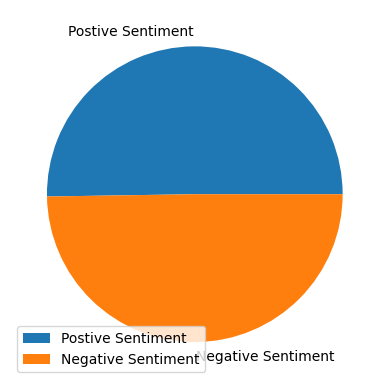

In [ ]:
#Plotting pie chart of the rating
y = np.array([101,100])
mylabels = ["Postive Sentiment", "Negative Sentiment"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show()

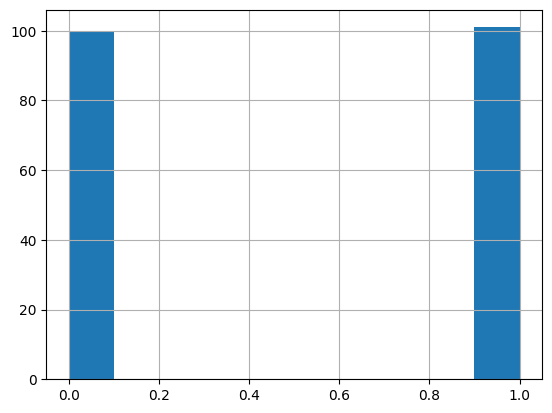

In [ ]:
data.rating.hist()
plt.show()

In [ ]:
#selecting the data
my_data=data[:150]
my_data

,rating,reviewText
0,1,This book was the very first bookmobile book I...
1,0,"When I read the description for this book, I c..."
2,1,I just had to edit this review. This book is a...
3,1,I don't normally buy 'mystery' novels because ...
4,1,"This isn't the kind of book I normally read, a..."
...,...,...
145,1,Who doesn't love Maggie Shayne . She's one of ...
146,0,"This could have been a good book, but whopping..."
147,0,This book comes out swinging and does not prov...
148,1,Even though I am not a cat lover by the time I...


In [ ]:
my_data.rating.value_counts()

1    78
0    72
Name: rating, dtype: int64

In [ ]:
#The labels for this dataset are categorical so we convert the categorical values to numeric using the factorize() method
sentiment_label = my_data.rating.factorize()
sentiment_label

(array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]),
 Int64Index([1, 0], dtype='int64'))

In [ ]:
tweet = my_data.reviewText
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           102048    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 118699 (463.67 KB)
Trainable params: 118699 (463.67 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10
2/2 [==============================] - 3s 482ms/step - loss: 0.6934 - accuracy: 0.5089 - val_loss: 0.6925 - val_accuracy: 0.4737
Epoch 2/10
2/2 [==============================] - 1s 310ms/step - loss: 0.6937 - accuracy: 0.5268 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 308ms/step - loss: 0.6928 - accuracy: 0.5179 - val_loss: 0.6931 - val_accuracy: 0.4737
Epoch 4/10
2/2 [==============================] - 1s 270ms/step - loss: 0.6901 - accuracy: 0.5893 - val_loss: 0.6933 - val_accuracy: 0.4737
Epoch 5/10
2/2 [==============================] - 0s 208ms/step - loss: 0.6897 - accuracy: 0.6786 - val_loss: 0.6934 - val_accuracy: 0.4474
Epoch 6/10
2/2 [==============================] - 0s 207ms/step - loss: 0.6876 - accuracy: 0.7679 - val_loss: 0.6932 - val_accuracy: 0.4474
Epoch 7/10
2/2 [==============================] - 0s 190ms/step - loss: 0.6874 - accuracy: 0.7589 - val_loss: 0.6933 - val_accuracy: 0.5263
Epoch 8/10
2/2 [====

In [ ]:
model.evaluate(padded_sequence,sentiment_label[0])

5/5 [==============================] - 0s 18ms/step - loss: 0.6777 - accuracy: 0.8200


[0.6776593923568726, 0.8199999928474426]

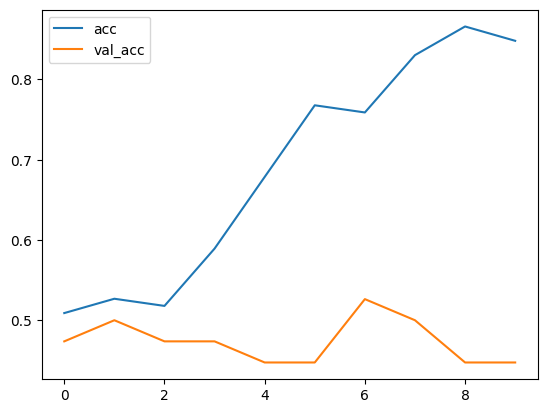

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

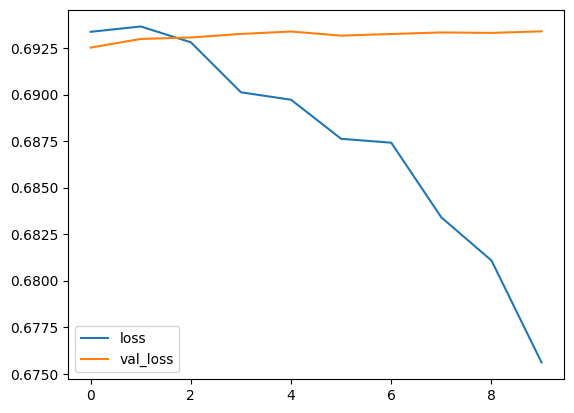

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]

test_sentence1 = "I like this book."
prediction = predict_sentiment(test_sentence1)

if prediction == 1:
    print("Postive Statement")
else:
    print("Negative Statement")

1/1 [==============================] - 0s 182ms/step
Postive Statement


In [ ]:
model.evaluate(padded_sequence,sentiment_label[0])

5/5 [==============================] - 0s 18ms/step - loss: 0.6777 - accuracy: 0.8200


[0.6776593923568726, 0.8199999928474426]